In [5]:
import chess
import chess.svg as svg
import numpy as np

In [33]:
class Node():
	def __init__(self, board, parent=[], is_white=True, l_castle=True, s_castle=True):
                self.reward = 0.0	
                self.board = board
                self.children = []
                self.parent = parent	
                self.visits = 1
                self.is_white = is_white
                self.s_castle = s_castle
                self.l_castle = l_castle

	def game_over(self):
                if self.board.is_checkmate():
                    return True
                elif self.board.is_repetition(): 
                    return True 
                elif self.board.is_stalemate(): 
                    return True 
                elif self.board.is_seventyfive_moves(): 
                    return True 
                elif self.board.is_fifty_moves():
                    return True
                elif self.board.is_insufficient_material():
                    return True
                
                else: 
                    return False

In [34]:
class chess_MCTS(): 
    def __init__(self): 
        self.board = chess.Board()
        self.moves = list(self.board.legal_moves)
        board = self.board.copy()
        self.initial_node = Node(board)
        code = board.unicode() + 'w'
        self.states = set(code)
        self.dict_nodes = {board.unicode(): self.initial_node}
        

    def add_children(self, node):
        moves = list(node.board.legal_moves)
        for move in moves:
            board = node.board.copy()
            is_white = node.is_white
            board.push(move)
            code = board.unicode() + is_white * "w"
            if code in self.states: 
                c_node = self.dict_nodes[code]
                c_node.parent.append(node)
                node.children.append(c_node)
            else: 
                new_node = Node(board, parent=[node], is_white=1-is_white)
                self.states.add(code)
                self.dict_nodes[code] = new_node
                node.children.append(new_node)


    def __call__(self, num_iteration, init_node=None): 
        for _ in range(num_iteration): 
            if init_node is not None: 
                node = init_node
            else: 
                node = self.initial_node
            w_nodes = [node.board.unicode() + "w"]
            b_nodes = []
            i = 0
            while not node.game_over(): 
                if node.children == []: 
                    self.add_children(node)
                crit = [(c.reward/c.visits) + np.sqrt(np.log(node.visits)/c.visits) for c in node.children]
                node.visits += 1
                node = node.children[np.argmax(crit)]
                if node.is_white: 
                    w_nodes.append(node.board.unicode() + "w")
                else: 
                    b_nodes.append(node.board.unicode())
                i += 1
                    
                
                    
            if node.board.is_checkmate():
                w_reward = 1 + node.is_white * (-2)
                b_reward = - w_reward
                for code in w_nodes: 
                    self.dict_nodes[code].reward += w_reward
                for code in b_nodes: 
                    self.dict_nodes[code].reward += b_reward
            print(_, node.board.is_checkmate(), i)
        return node
                

        

In [35]:
MCTS = chess_MCTS()

In [36]:
node = MCTS(100)

0 False 1292
1 False 4740
2 False 1258
3 False 1906
4 False 2186
5 False 1994
6 False 2424
7 False 3120
8 False 2094
9 False 2584
10 False 1843
11 False 1332
12 False 661


KeyError: '♜ ♞ ♝ ♛ ♚ ♝ ♞ ♜\n♟ ♟ ♟ ♟ ♟ ♟ ♟ ♟\n⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘\n⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘\n⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘\n⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘\n♙ ♙ ♙ ♙ ♙ ♙ ♙ ♙\n♖ ♘ ♗ ♕ ♔ ♗ ♘ ♖w'

In [32]:
board = chess.Board()
moves = list(board.legal_moves)
board.push(moves[6])
moves = list(board.legal_moves)
board.push(moves[0])
code = board.unicode()
MCTS.dict_nodes[code].reward

KeyError: '♜ ♞ ♝ ♛ ♚ ♝ ⭘ ♜\n♟ ♟ ♟ ♟ ♟ ♟ ♟ ♟\n⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ♞\n⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘\n⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘ ⭘\n⭘ ⭘ ⭘ ⭘ ⭘ ♙ ⭘ ⭘\n♙ ♙ ♙ ♙ ♙ ⭘ ♙ ♙\n♖ ♘ ♗ ♕ ♔ ♗ ♘ ♖'

In [11]:
moves[0]

Move.from_uci('g8h6')

In [10]:
board = chess.Board()
moves = list(board.legal_moves)
board.push(moves[5])

In [12]:
node = MCTS.dict_nodes[board.unicode()]

In [22]:
node.reward

AttributeError: 'Board' object has no attribute 'reward'

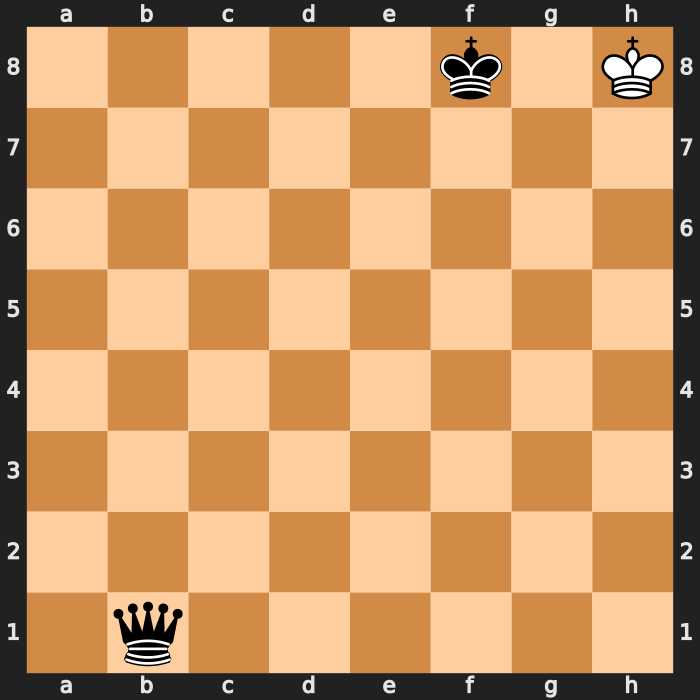

In [89]:
svg.board(board, size=700)

In [65]:
board.is_checkmate()

False

In [67]:
l = [12, 3, 17, 8]

In [68]:
l

[12, 3, 17, 8]

In [70]:
np.argmax(l)

2

In [ ]:
board = chess.Board()
board

In [46]:
i = 0
while True: 
    i += 1
    if board.is_checkmate():
        break
    elif board.is_stalemate(): 
        break
    elif board.is_repetition(): 
        break
    moves = list(board.legal_moves)
    board.push(moves[np.random.randint(0, len(moves))])

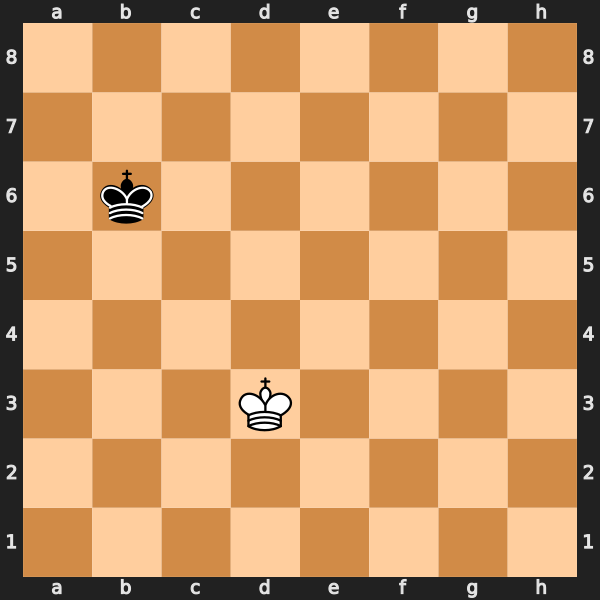

In [52]:
svg.board(board, size=600)

In [53]:
def from_board_to_matrix(unicode): 
    Board = torch.zeros(12, 64)
    b = b = re.sub(" ", "", unicode)
    b = re.sub("\n", "", b)
    b_array = np.array(list(b))
    for index, piece in enumerate(pieces): 
        ii = np.where(b_array == piece)[0]
        ii = torch.from_numpy(ii)
        Board [ii, index] = torch.tensor(1, dtype=torch.float32)
    return Board.view(-1, 8, 8)

841

In [ ]:
class ConvBlock(nn.Module):
    def __init__(self):
        super(ConvBlock, self).__init__()
        self.action_size = 8*8*73
        self.conv1 = nn.Conv2d(12, 64, 3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(256)

    def forward(self, s):
        s = s.view(-1, 12, 8, 8)  # batch_size x channels x board_x x board_y
        s = F.relu(self.bn1(self.conv1(s)))
        return s

In [ ]:
class ResBlock(nn.Module):
    def __init__(self, inplanes=64, planes=64, stride=1, downsample=None):
        super(ResBlock, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = F.relu(self.bn1(out))
        out = self.conv2(out)
        out = self.bn2(out)
        out += residual
        out = F.relu(out)
        return out

In [ ]:
class OutBlock(nn.Module):
    def __init__(self):
        super(OutBlock, self).__init__()
        self.conv = nn.Conv2d(64, 1, kernel_size=1) # value head
        self.bn = nn.BatchNorm2d(1)
        self.fc1 = nn.Linear(8*8, 64)
        self.fc2 = nn.Linear(64, 1)
        
        self.conv1 = nn.Conv2d(32, 32, kernel_size=1) # policy head
        self.bn1 = nn.BatchNorm2d(32)
        self.logsoftmax = nn.LogSoftmax(dim=1)
        self.fc = nn.Linear(8*8*32, 8*8*73)
    
    def forward(self,s):
        v = F.relu(self.bn(self.conv(s))) # value head
        v = v.view(-1, 8*8)  # batch_size X channel X height X width
        v = F.relu(self.fc1(v))
        v = F.tanh(self.fc2(v))
        
        p = F.relu(self.bn1(self.conv1(s))) # policy head
        p = p.view(-1, 8*8*128)
        p = self.fc(p)
        p = self.logsoftmax(p).exp()
        return p, v

In [ ]:
class ChessNet(nn.Module):
    def __init__(self):
        super(ChessNet, self).__init__()
        self.conv = ConvBlock()
        for block in range(4):
            setattr(self, "res_%i" % block,ResBlock())
        self.outblock = OutBlock()
    
    def forward(self,s):
        s = self.conv(s)
        for block in range(4):
            s = getattr(self, "res_%i" % block)(s)
        s = self.outblock(s)
        return s
        

In [ ]:

class AlphaLoss(torch.nn.Module):
    def __init__(self):
        super(AlphaLoss, self).__init__()

    def forward(self, y_value, value, y_policy, policy):
        value_error = (value - y_value) ** 2
        policy_error = torch.sum((-policy* 
                                (1e-6 + y_policy.float()).float().log()), 1)
        total_error = (value_error.view(-1).float() + policy_error).mean()
        return total_error

In [ ]:
def train(MCTS): 
    device = torch.device("mps")
    

In [ ]:
def 